<a href="https://colab.research.google.com/github/burakerdgn/GoogleColab/blob/main/Build_Own_Model%26%26_Kavramlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build own model**

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
# Define Linear Regression Model
class LinearRegression(tf.keras.Model):
  def __init__(self,num_inputs, num_outputs):
    super(LinearRegression,self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

In [ ]:
# Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2 - 1
w = np.random.randn(D,K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N,1) * 0.1

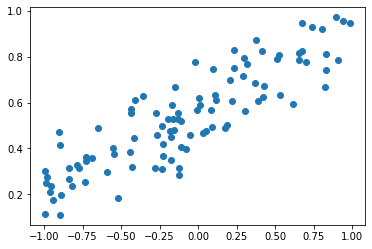

In [ ]:
plt.scatter(X,Y)

In [ ]:
# Cast type, otherwise Tensorflow will complain
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Define the loss
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [ ]:
# Gradient function
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = get_loss(model, inputs, targets)

  # return gradient
  return tape.gradient(loss_value, model.params)

In [ ]:
# Create and train the model
model = LinearRegression(D,K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.07751474]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model,X,Y)

  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))

  # Store the loss
  loss = get_loss(model, X ,Y)
  losses.append(loss)

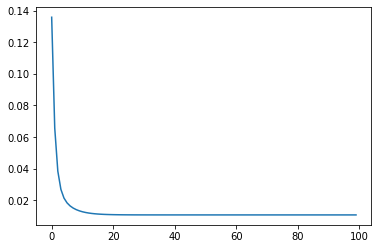

In [ ]:
plt.plot(losses)

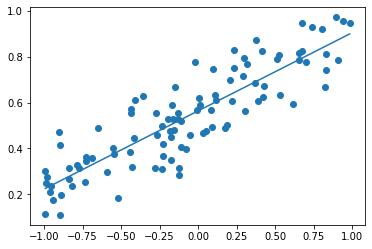

In [ ]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()

plt.scatter(X,Y)
plt.plot(x_axis, y_axis)

In [ ]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.34155968]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.56357706], dtype=float32)>


In [ ]:
print("True params:")
w,b

True params:


(array([[0.33849858]]), 0.5746444925776516)

# **Mean Square Error**

Linear regression'da noktalarin hepsine esit uzaklikta olucak sekilde cekilen cizginin hesaplanmasi icin kullanilan formul

# **Binary Cross-Entropy**

The correct loss function to use for binary classification.  Eger 1 ve 0 li bir siniflandirma yapilacaksa bu function kullanilir

# **Categorical Cross Entropy**

Coklu siniflandir icin kullanilan loss function cesidi

# **Gradient Descent**

* For models(such as linear regression) we come up with with a cost / loss function

* We want to minimize the cost(L) with respect to the parameters (w)

* **Gradient Descent -> Dereceli azalma** anlamina gelir, 2. dereceden denklemlerin turevleri bize denklemin olusturdugu scope un egrisini verirken, denklemin turevini 0 a esitleyip , 2. dereceden denklemin max ve min noktalari bulanabilir. Gradient Descent te 2. dereceden buyuk denklemlerin cozumu icin kullanilan tekniktir. 

* **Hyperparameters** = Learning rateleri kucuk tutularak, denklemin min noktasina ulasilmaya calisilir. Fakat learning rateler buyuk alinirsa scope ta min noktasi atlanarak karsi tarafa gecilebilir

* **Epochs** = Minimum loss function bulunurken , iterative deneme sayisi

  




# **Stochastic Gradient Descent**

* SGD, daha hizli train etmek icin eldeki verilerden random ornekler cekildiginde kullanilir. Ex. Batch size!!!

# **Momentum**

* Gradient Descent uygulanirken, islemin ara noktalarda sikismamasi ve daha hizli sonuca varmak icin kullanilan yontem

* https://www.quora.com/What-does-momentum-mean-in-neural-networks



# **Variable and Adaptive Learning Rates**

* **Step Decay** = Belli sayida epochs'tan sonra learning rate'in belli oranda dusurulmesi

* **Exponential Decay** = Learning Rate exponential sekilde surekli azaliyor

* **AdaGrad** = Adaptive Learning Rate Techniques. Her adimda Learning Rate Degisir
    * **Cache** = Her neural vectorun ayni zamanda bir cache vektoru vardir. Gradient'e dogru orantili olarak degisir. Yüksek gradient olan yerlerde cache artar learning rate duser.
* **RMSProp** = AdaGrad tekniginde learning rate cok hizli bir sekilde 0 a yaklasiyor cunku cache cok hizli buyuyor.Bu buyumeyi kontrol altina almak icin cache denklemine decay rate eklenerek cache'in hizli büyümesi kontrol altina aliniyor


# **Adam**

* **Adam** = Adaptive Moment Estimation, bir baska gradient descent modify etme yontemi
    * Cok kullanilmasinin sebebi default settings halinde bile iyi sonuclar vermesi. Learning rate ve momentum parameter ayarlamasina gerek yok
    * RMSprop'un ileri versiyonu
    * Geoffrey Hinton'in phd ogrencisi Jimmy Ba tarafindan gelistirildi
    
